As part of my ~*~capstone~*~ project for the coding app I pay a bajillion dollars for to teach me how to code good, I am going to be doing some data science. Well. Dating app science. Using data from OKCupid, I'm going to teach a machine learning algorithm to find love. 

Can computers love? Fiction has attempted to solve this problem using such things as plots. But not us. We have math. 

## Project scoping

### Goals

The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. Many dating app users consider astrological signs to be an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be.

### Data source

Luckily for me, CodeCademy has provided me with all of the data I could want on OkCupid users, in a nice, convenient file called -- get this -- `profiles.csv`.

### Analysis

The plan, of course, is to use descriptive statistical analysis to find key figures and understand the distribution, count, and relationship between variables. I will also be using classification algorithms to make assumptions where there is little or no data, since the machine has to do something with all its learns. 

In [2]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading data

In [3]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


I wanted to grab the length of `profiles.csv`, but luckily for us it also have us some great information on some of these folks on the dating market too. We now know that the dataset has almost 60,000 people in it, with a mean height of 5'8" and a mean income of $20,000. Of course, these means are not the only measure of average that we have, and we will look at them a little closer after learning more about what we even know about our 59,946 test subjects. 

In [6]:
list(profiles.columns) 

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

The columns in the dataset are:

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations


Including open-ended essay questions:

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


## Explore the data

Now that we know what information we have access to, let's learn a little bit more about our bachelors, bachelorettes, and bachelori of all genders. 

In [12]:
print("Number of star signs: ", profiles.sign.nunique())
print("Star signs: ", profiles.sign.unique())

Number of star signs:  48
Star signs:  ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scor

There aren't actually 48 star signs, so we should get rid of the qualifiers and go straight to the signs.

Number of star signs:  12
Star signs:  ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


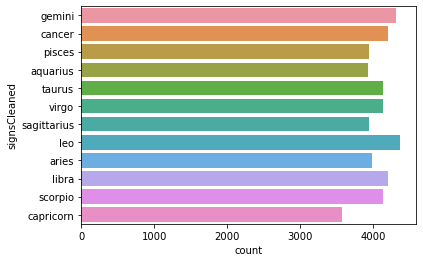

In [31]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print("Number of star signs: ",profiles.signsCleaned.nunique())
print("Star signs: ", profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()
sns.countplot(data=profiles, y="signsCleaned");
#sns.swarmplot(x="signsCleaned", y="age", data=profiles)

In [19]:
print("Number of body types: ", profiles.body_type.nunique())
print("Body types: ", profiles.body_type.unique())

print("Number of diets: ", profiles.diet.nunique())
print("Diets: ", profiles.diet.unique())

Number of body types:  12
Body types:  ['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
Number of diets:  18
Diets:  ['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']


### Continuous variables
Let's check out some continuous variables, and get an idea of how spread out our list of would be lovers are.

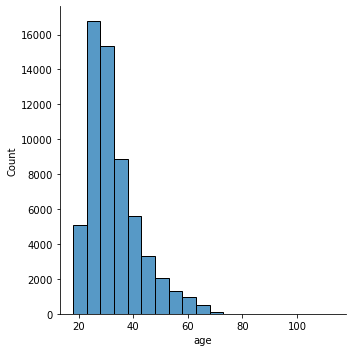

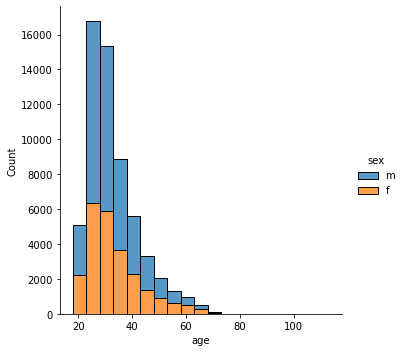

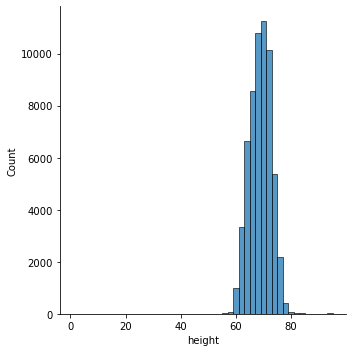

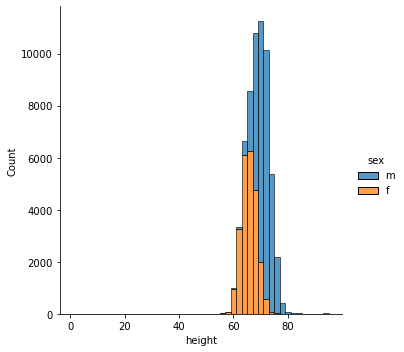

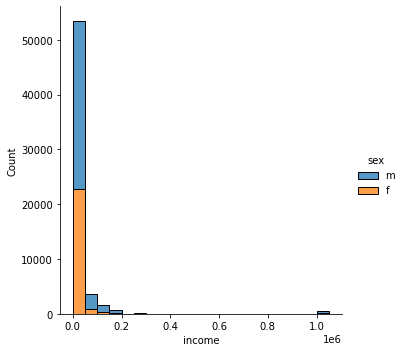

In [23]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple ="stack");
sns.displot(data=profiles, x="height", kind="hist", binwidth = 2);
sns.displot(data=profiles, x="height", hue="sex", kind="hist", binwidth = 2, multiple="stack");
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple ="stack");

### Discrete variables 
Now let's see the distribution of discrete and categorical variables.

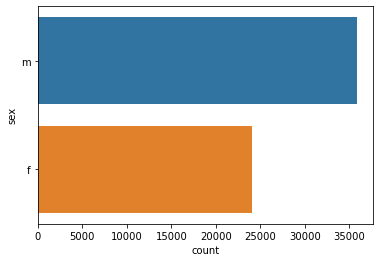

In [26]:
# Sex distributions
sns.countplot(data=profiles, y="sex");

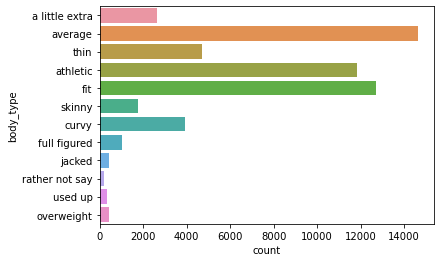

In [27]:
# Body type distribution
sns.countplot(data=profiles, y="body_type");

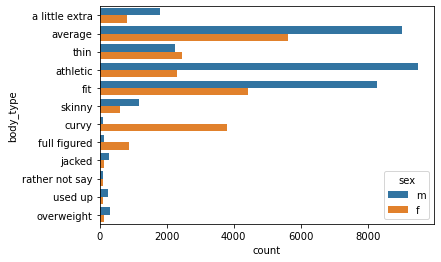

In [28]:
# Breaking down body type by sex
sns.countplot(data=profiles, y="body_type", hue="sex");

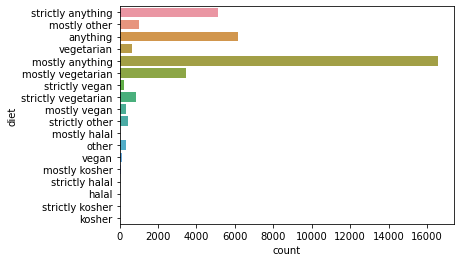

In [29]:
# Diet distribution 
sns.countplot(data=profiles, y="diet");

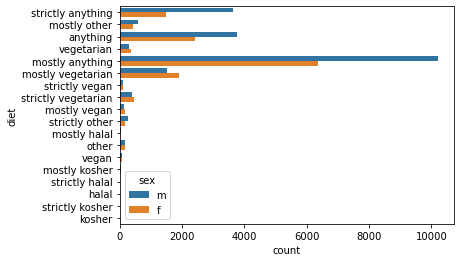

In [30]:
# Diet distribution by sex
sns.countplot(data=profiles, y="diet", hue="sex");

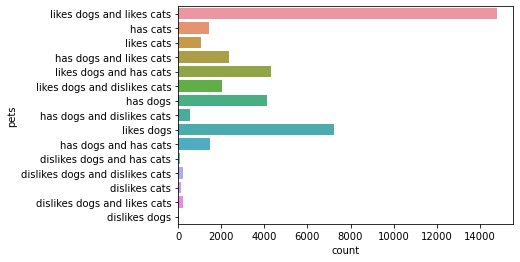

In [32]:
# Okay, one more, let's take a look at pets
sns.countplot(data=profiles, y="pets");

## Prep for the fun stuff

Now that we've taken a look at some of the various distributions in our dataset, but by no means all, we should consider getting to the real business: cleaning up the data and preparing it for training and testing. 

#### Preprocessing

First we need to check how many nulls and nans we have, and get rid of them since they won't contribute anything to our learning process.

In [33]:
profiles.isnull().sum()

age                 0
body_type        5296
diet            24395
drinks           2985
drugs           14080
education        6628
essay0           5488
essay1           7572
essay2           9638
essay3          11476
essay4          10537
essay5          10850
essay6          13771
essay7          12451
essay8          19225
essay9          12603
ethnicity        5680
height              3
income              0
job              8198
last_online         0
location            0
offspring       35561
orientation         0
pets            19921
religion        20226
sex                 0
sign            11056
smokes           5512
speaks             50
status              0
signsCleaned    11056
dtype: int64

In [35]:
cols = ['body_type', 'diet', 'orientation', 'pets',
       'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(20724, 7)

#### Dummy Variables

We will have to create some dummy variables to deal with the categorical variables. Dummy variables will turn the descriptive categories into its own numerical identifiers to allow Mr. Computer to do a better job at mathing our solution. Luckily, pandas has a method (`pd.get_dummies()`) to make assigning dummy variables far easier.

In [36]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [37]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pisces,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting into training and testing sets

Next, the data needs to be split into training and validation sets. Here I've kept 75% of the data for training and 25% will be used to test the model.

In [39]:
col_length = len(df.columns)

# Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

# Validation chunk size
val_size = 0.25

# Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

# Turn in to 1-D arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

### Prediction

#### Building the model

ScikitLearn has a ton of existing multiclass models, so we will be using some of them today to train our classifiers. For this project I'll be using:

- Logistic regression
- KNearest neighbors 
- Decision trees


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#### Logistic regression

First up, a logistic regression model.

Our model accuracy is an unfortunate 11%, which is worse than random at predicting star signs.

In [48]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.12      0.04      0.06      1182
       aries       0.11      0.08      0.09      1246
      cancer       0.12      0.24      0.16      1392
   capricorn       0.12      0.02      0.03      1150
      gemini       0.11      0.12      0.11      1377
         leo       0.11      0.14      0.12      1389
       libra       0.11      0.10      0.10      1312
      pisces       0.11      0.09      0.10      1276
 sagittarius       0.12      0.07      0.09      1209
     scorpio       0.11      0.09      0.10      1308
      taurus       0.11      0.12      0.12      1338
       virgo       0.12      0.20      0.15      1364

    accuracy                           0.11     15543
   macro avg       0.11      0.11      0.10     15543
weighted avg       0.11      0.11      0.10     15543



#### K Nearest Neighbors

The next models is the `KNeighborsClassifier` which will take 20 close neighbors to predict the signs. Our model had a 28% accuracy which is more accurate than our logistic regression.

In [45]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_test)

print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.21      0.57      0.31      1182
       aries       0.23      0.44      0.30      1246
      cancer       0.28      0.36      0.31      1392
   capricorn       0.27      0.29      0.28      1150
      gemini       0.32      0.25      0.28      1377
         leo       0.32      0.25      0.28      1389
       libra       0.28      0.22      0.25      1312
      pisces       0.35      0.20      0.26      1276
 sagittarius       0.30      0.20      0.24      1209
     scorpio       0.36      0.19      0.25      1308
      taurus       0.34      0.21      0.26      1338
       virgo       0.38      0.21      0.27      1364

    accuracy                           0.28     15543
   macro avg       0.30      0.28      0.27     15543
weighted avg       0.31      0.28      0.27     15543



#### Decision tree

The next models is the `Decision Tree Classifier` which had a more impressive 53% success rate.

In [49]:
dt_model = DecisionTreeClassifier().fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_train)

print(classification_report(Y_train, dt_predictions))

              precision    recall  f1-score   support

    aquarius       0.43      0.73      0.54      1182
       aries       0.44      0.68      0.53      1246
      cancer       0.45      0.66      0.54      1392
   capricorn       0.54      0.54      0.54      1150
      gemini       0.52      0.56      0.54      1377
         leo       0.54      0.53      0.54      1389
       libra       0.60      0.49      0.54      1312
      pisces       0.60      0.47      0.53      1276
 sagittarius       0.61      0.43      0.51      1209
     scorpio       0.67      0.40      0.50      1308
      taurus       0.67      0.41      0.51      1338
       virgo       0.61      0.43      0.50      1364

    accuracy                           0.53     15543
   macro avg       0.56      0.53      0.53     15543
weighted avg       0.56      0.53      0.53     15543



Below, let's take a look at a confusion matrix for our most accurate model tested, which tracks our predictions against true values.

In [54]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, dt_predictions)
cart_labels = dt_model.classes_

print('Decision tree model depth: ', dt_model.get_depth())

Decision tree model depth:  56


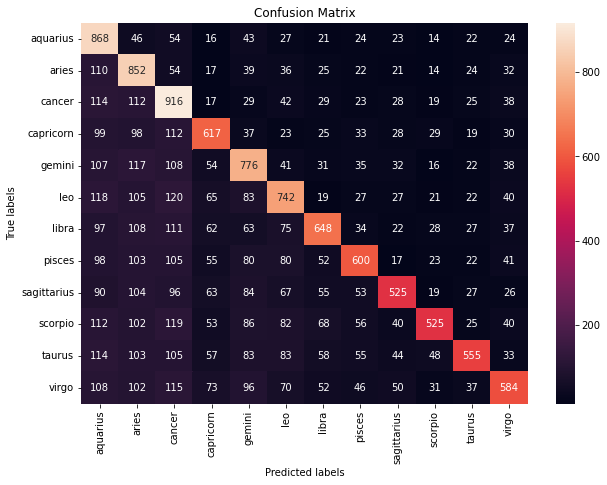

In [51]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
sns.heatmap(cart_cm, annot=True, ax=ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

Let's try our decision tree model again, but limit the depth to see if it changes our model accuracy.

              precision    recall  f1-score   support

    aquarius       0.46      0.51      0.48      1182
       aries       0.43      0.49      0.46      1246
      cancer       0.41      0.50      0.45      1392
   capricorn       0.51      0.40      0.45      1150
      gemini       0.47      0.41      0.44      1377
         leo       0.44      0.41      0.42      1389
       libra       0.50      0.36      0.42      1312
      pisces       0.48      0.39      0.43      1276
 sagittarius       0.52      0.34      0.41      1209
     scorpio       0.38      0.34      0.36      1308
      taurus       0.47      0.34      0.39      1338
       virgo       0.24      0.48      0.32      1364

    accuracy                           0.41     15543
   macro avg       0.44      0.41      0.42     15543
weighted avg       0.44      0.41      0.42     15543



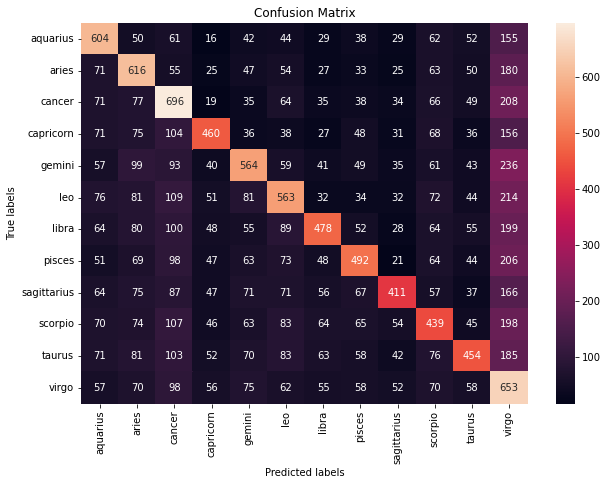

In [63]:
dt_model20 = DecisionTreeClassifier(max_depth = 30).fit(X_train, Y_train) 
dt_predictions20 = dt_model20.predict(X_train) 

cart_cm20 = confusion_matrix(Y_train, dt_predictions20)
cart_labels20 = dt_model20.classes_

print(classification_report(Y_train, dt_predictions20))

plt.figure(figsize=(10,7))

ax = plt.subplot()
sns.heatmap(cart_cm20, annot=True, ax=ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels20); 
ax.yaxis.set_ticklabels(cart_labels20);

For some reason our model things everyone is a virgo, but who can blame it. It looks like limiting the depth fixed the prediction for some signs, but hurt it for others. Since the decision tree was the most accurate of all of our models, I think we can call it a day here and say it's the best we got comparatively.

### Conclusions

#### Takeaways

Our model isn't extremely accurate, but it gets the job done. Of course, we wouldn't need to make such a complex prediction model is OkCupid just took star signs from uers' birthdays, which we 1. wouldn't have to even do stats to get the answer 2. have 100% accuracy.  

#### What's next

If we want to go crazy, we could take the open ended essay answers, and try to predict star signs by creating topics models for individual users and banking them with known signs. Now that would be fun, but it's a little bit longer than a weekend task! 